# Painter Automata

This is a painter automata. It follows simple rules and is completely dependent on the intial conditions.

The world starts out completely white, with the painter in the middle as if it just took a step "downwards".

The painter works according to these rules:

* It has a palette of n colours, where every colour has a number, k, attributed to it.
* When it walks over a square, the colour is changed to k + 1 (mod n).
* Every colour is either a left-hand or a right-hand colour, decided by a boolean string.
* If it walks over a left-hand colour, it turns left and vice versa.
It works for the given number of timesteps or until it has reached the boundaries of the canvas.  



In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.cm as cm
import matplotlib as mpl

#Nice Patterns, given a number "binarily"
#[0, 1, 0, 0, 0, 0, 1] 33
#[1, 0, 1, 1, 1, 1, 0] 94
#[0, 1, 1, 1, 1, 0, 0] 60
#[1, 1, 0, 1, 1, 1, 1] 111
#[0, 0, 1, 0, 0, 0, 0] 16
#[0, 1, 1, 1, 1, 1, 0] 62

In [271]:
rows = 200
columns = 200

numGraphs = 100
timesteps = 50000

colors = ['white', 'green', 'blue', 'yellow', 'brown','black', 'red']
bounds = [0,1,2,3,4,5,6]

In [272]:
def painter(timesteps, boolArr):
    paintBoard = np.zeros(shape=(rows, columns), dtype=int)
    startPos = math.floor(len(paintBoard)/2)
    currX = startPos
    currY = startPos

    prevX = startPos
    prevY = startPos + 1 

    countif = 0
    countelse = 0
    
    for step in range(0,timesteps):
        
        if currX is rows or currX is -1 or currY is columns or currY is -1:
            break
            
        elif boolArr[paintBoard[currX][currY]]:
            countif += 1
            paintBoard[currX][currY] += 1

            if paintBoard[currX][currY] >= len(colors):
                paintBoard[currX][currY] = 0

            xChange = currX - prevX
            yChange = currY - prevY

            if xChange is 0:
                if yChange > 0:
                    prevX = currX
                    prevY = currY
                    currX = currX + 1

                elif yChange < 0:
                    prevX = currX
                    prevY = currY
                    currX = currX -1

            elif xChange < 0:
                    prevX = currX
                    prevY = currY
                    currY = currY + 1

            elif xChange > 0:
                    prevX = currX
                    prevY = currY
                    currY = currY - 1
                    
        else:
            countelse += 1
            paintBoard[currX][currY] += 1

            if paintBoard[currX][currY] >= len(colors):
                paintBoard[currX][currY] = 0

            xChange = currX - prevX
            yChange = currY - prevY

            if xChange is 0:
                if yChange > 0:
                    prevX = currX
                    prevY = currY
                    currX = currX - 1

                if yChange < 0:
                    prevX = currX
                    prevY = currY
                    currX = currX + 1

            if xChange < 0:
                    prevX = currX
                    prevY = currY
                    currY = currY - 1


            if xChange > 0:
                    prevX = currX
                    prevY = currY
                    currY = currY + 1
                        
    return paintBoard, countif, countelse

[0, 1, 1, 1, 0, 0, 0]
Right turns taken: 22695, left turns taken: 27305


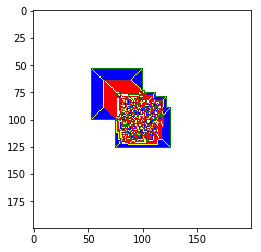

[1, 1, 1, 1, 1, 0, 1]
Right turns taken: 43366, left turns taken: 6634


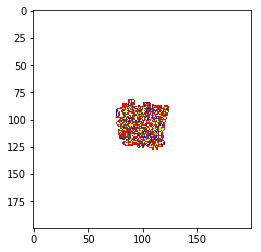

[0, 1, 0, 0, 0, 0, 1]
Right turns taken: 12634, left turns taken: 37366


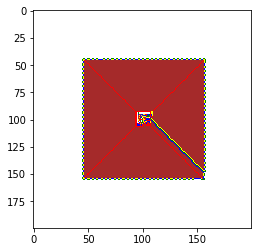

[1, 0, 1, 1, 1, 1, 0]
Right turns taken: 37366, left turns taken: 12634


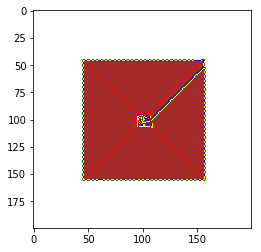

[0, 1, 1, 1, 1, 0, 0]
Right turns taken: 28911, left turns taken: 21089


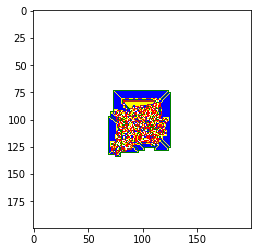

[1, 1, 0, 1, 1, 1, 1]
Right turns taken: 41633, left turns taken: 8367


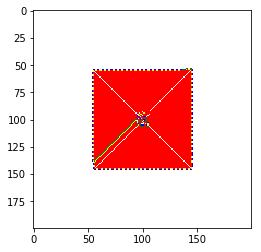

[0, 0, 1, 0, 0, 0, 0]
Right turns taken: 8367, left turns taken: 41633


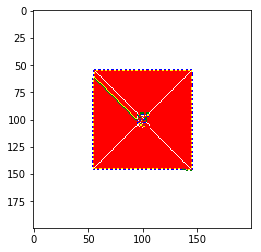

[0, 1, 1, 1, 1, 1, 0]
Right turns taken: 35673, left turns taken: 14327


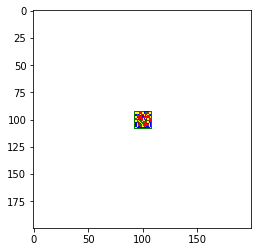

In [273]:
#Feel free to try out different starting states with ownArr = 1
ownArr = 1
randArr = 0

if ownArr is 1:
    boolArr = [[0, 1, 1, 1, 0, 0, 0],
               [1, 1, 1, 1, 1, 0, 1],
               [0, 1, 0, 0, 0, 0, 1], 
               [1, 0, 1, 1, 1, 1, 0], 
               [0, 1, 1, 1, 1, 0, 0], 
               [1, 1, 0, 1, 1, 1, 1],
               [0, 0, 1, 0, 0, 0, 0],
               [0, 1, 1, 1, 1, 1, 0]]

if randArr is 1:
    boolArr = []
    for i in range(0, numGraphs):
        boolArr.append(np.random.randint(2, size=7))

for graph in range(0,len(boolArr)):
    
    print(boolArr[graph])
    
    paintBoard, countif, countelse = painter(timesteps, boolArr[graph])
    print("Right turns taken: %d, left turns taken: %d" % (countif,countelse))

    cmap = mpl.colors.ListedColormap(colors)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    #plt.imshow(paintBoard, interpolation='nearest')
    #plt.show()
    plt.imshow(paintBoard, interpolation='nearest', cmap=cmap, norm=norm)
    plt.show()